In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('./Call_center_survey.csv')

df.head()

,Cust_id,Age,Account_balance,Personal_loan_ind,Home_loan_ind,Prime_Customer_ind,Overall_Satisfaction
0,CX01-001,49,23974,1,0,1,Dis Satisfied
1,CX01-002,25,72374,0,1,1,Satisfied
2,CX01-003,32,65532,0,0,1,Satisfied
3,CX01-004,70,28076,0,1,1,Dis Satisfied
4,CX01-005,23,38974,1,1,1,Satisfied


In [15]:
df.shape

(12330, 7)

In [16]:
df.drop(columns=['Cust_id'], axis=1, inplace=True)
df.head(3)

,Age,Account_balance,Personal_loan_ind,Home_loan_ind,Prime_Customer_ind,Overall_Satisfaction
0,49,23974,1,0,1,Dis Satisfied
1,25,72374,0,1,1,Satisfied
2,32,65532,0,0,1,Satisfied


In [25]:
df['Account_balance'].min(), df['Account_balance'].max()

(4904, 109776)

In [17]:
df['Overall_Satisfaction'].value_counts()

Overall_Satisfaction
Dis Satisfied    6707
Satisfied        5623
Name: count, dtype: int64

In [18]:
df['Overall_Satisfaction'] = df['Overall_Satisfaction'].map({ 'Dis Satisfied': 0, 'Satisfied': 1})
df['Overall_Satisfaction'].value_counts()

Overall_Satisfaction
0    6707
1    5623
Name: count, dtype: int64

In [19]:
X = df.drop(columns=['Overall_Satisfaction'])
y = df['Overall_Satisfaction']

X.columns

Index(['Age', 'Account_balance', 'Personal_loan_ind', 'Home_loan_ind',
       'Prime_Customer_ind'],
      dtype='object')

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)



DecisionTreeClassifier(max_depth=2)

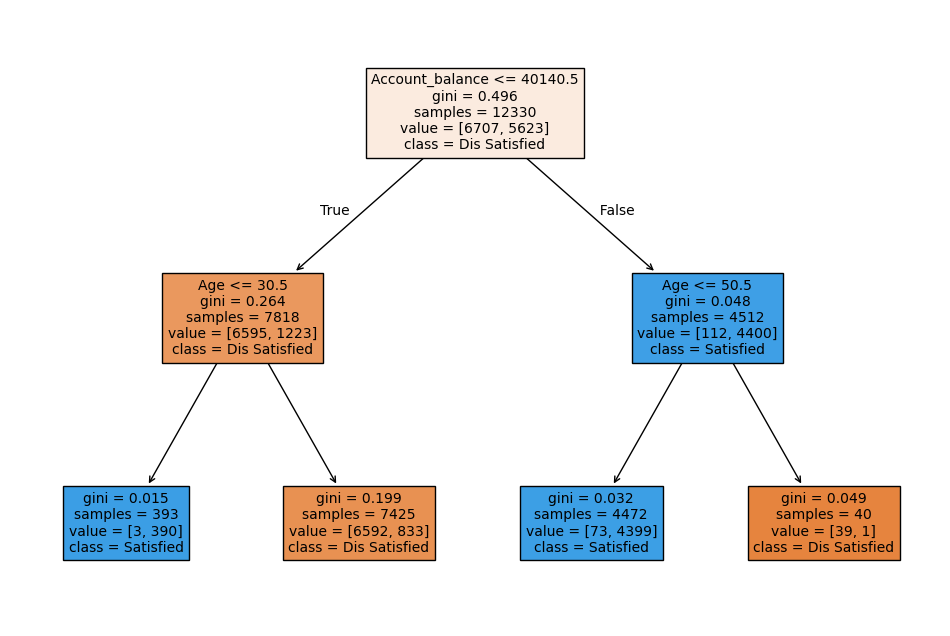

In [22]:
# visualizing tree 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Dis Satisfied', 'Satisfied'], filled=True, fontsize=10)
plt.show()

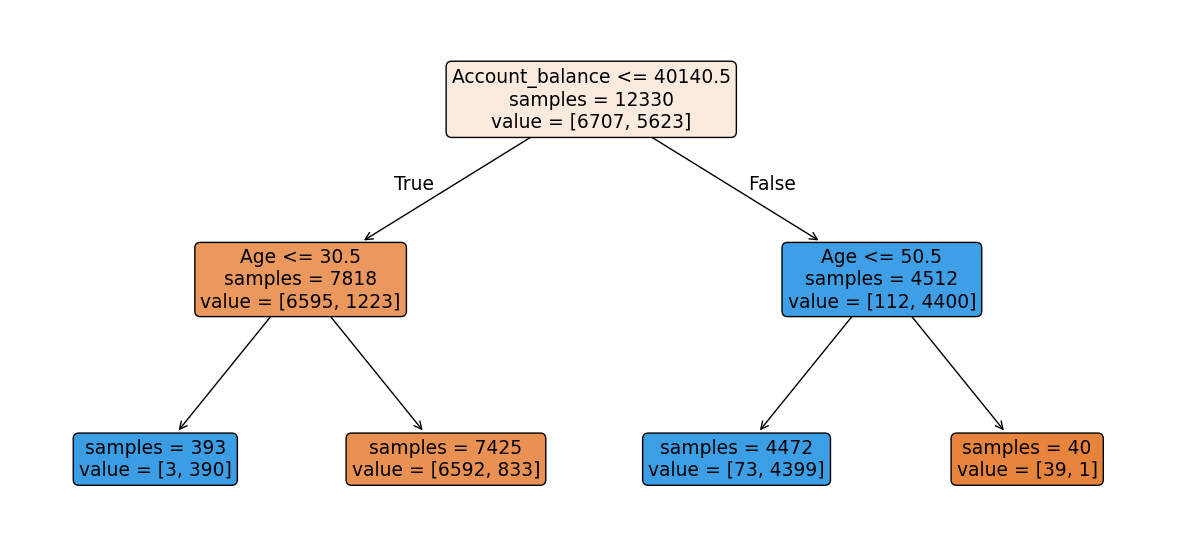

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15, 7))
plot_tree(
    model,
    filled=True,
    rounded=True,
    impurity=False,
    feature_names=X.columns,
)
plt.show()